In [12]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [13]:
koneksi = sqlite3.connect('database.db')

In [14]:
cursor = koneksi.cursor()

# Desain Database
<img src="desaindb.png">

In [15]:
cursor.executescript('drop table if exists kota')
cursor.executescript('drop table if exists customer')
cursor.executescript('drop table if exists cabang')
cursor.executescript('drop table if exists produk')
cursor.executescript('drop table if exists transaksi')

cursor.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id_kota' INT, 'nama_kota' VARCHAR(255) NULL, PRIMARY KEY ('id_kota'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'customer' ('id_customer' INT, 'jenis_customer' VARCHAR(255) NULL, 'gender' VARCHAR(255) NULL,'kota_id_kota' INT NOT NULL, PRIMARY KEY ('id_customer'), FOREIGN KEY ('kota_id_kota') REFERENCES 'kota' ('id_kota') ON DELETE NO ACTION ON UPDATE NO ACTION)")
cursor.execute("CREATE TABLE IF NOT EXISTS 'cabang' ('id_cabang' INT, 'cabang' VARCHAR(255) NULL, PRIMARY KEY ('id_cabang'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'produk' ('id_produk' INT, 'jenis_produk' VARCHAR(255) NULL, 'harga' FLOAT NULL, 'rating' FLOAT NULL, PRIMARY KEY ('id_produk'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'transaksi' ('id_transaksi' INT, 'tanggal_transaksi' DATE NULL, 'quantity' INT(5) NULL, 'jenis_pembayaran' VARCHAR(255) NULL, 'customer_id_customer' INT NOT NULL, 'produk_id_produk' INT NOT NULL, 'cabang_id_cabang' INT NOT NULL, PRIMARY KEY ('id_transaksi'), FOREIGN KEY ('customer_id_customer') REFERENCES 'customer' ('id_customer') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('produk_id_produk') REFERENCES 'produk' ('id_produk') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('cabang_id_cabang') REFERENCES 'cabang' ('id_cabang') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [25]:
df = pd.read_csv("dataset_supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [17]:
kota = []
customer = []
cabang = []
produk = []
for i,j in df.iterrows():
    if j[2] not in kota:
        kota.append(j[2])
        
    k = -1
    for index, value in enumerate(kota):
        if value == j[2]:
            k = index+1
            break
            
    if [j[3],j[4], j[2]] not in enumerate(customer):
        customer.append([j[3], j[4],k])
    
    if [j[1]] not in cabang:
        cabang.append(j[1])
    

    if [j[5],j[6], j[16]] not in produk:
        produk.append([j[5],j[6], j[16]])

#print(kota)
#print(customer)
#print(cabang)
#print(produk)

transaksi = []
for i,j in df.iterrows():   
    c = -1
    #value adalah hasil untuk list customer = [jenis(member/normal)[0][3], gender[1][4], kota[2]]
    for index, value in enumerate(customer):
        if value[0] == j[3]:
            c = index+1
            #print(value[0])
            break
            
    p = -1
    for index, value in enumerate(produk):
        if value[0] == j[5]:
            p = index+1
            break
    
    ca = -1
    for index, value in enumerate(cabang):
        if value[0] == j[1]:
            ca = index+1
            
    transaksi.append([datetime.datetime.strptime(j[10], '%m/%d/%Y').strftime('%Y-%m-%d'), j[7], j[12], c, p, ca])
#print(transaksi)

In [18]:
cursor.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    cursor.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i) + "')")

cursor.execute("DELETE FROM CUSTOMER")
for index, i in enumerate(customer):
    cursor.execute("INSERT INTO CUSTOMER VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
    
cursor.execute("DELETE FROM CABANG")
for index, i in enumerate(cabang): 
    cursor.execute("INSERT INTO CABANG VALUES(" + str(index+1) + ", '" + str(i[0]) + "')")
    
cursor.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk): 
    cursor.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
    
cursor.execute("DELETE FROM TRANSAKSI")
for index, i in enumerate(transaksi):
    customer_id_customer = i[2]
    produk_id_produk = i[3]
    cabang_id_cabang = i[4]
    cursor.execute("INSERT INTO TRANSAKSI VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','" + str(customer_id_customer) + "','" + str(produk_id_produk) + "','" + str(cabang_id_cabang) + "')")
    
koneksi.commit()

In [19]:
cursor.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in cursor.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")
print()

cursor.execute('''SELECT * FROM CUSTOMER''')

CUSTOMER = []
for row in cursor.fetchall():
    CUSTOMER.append(row)
print("========================CUSTOMER================================")
print(CUSTOMER)
print("================================================================")
print()

cursor.execute('''SELECT * FROM CABANG''')

CABANG = []
for row in cursor.fetchall():
    CABANG.append(row)
print("========================CABANG================================")
print(CABANG)
print("==============================================================")
print()

cursor.execute('''SELECT * FROM PRODUK''')

PRODUK = []
for row in cursor.fetchall():
    PRODUK.append(row)
print("========================PRODUK================================")
print(PRODUK)
print("==============================================================")
print()

cursor.execute('''SELECT * FROM TRANSAKSI''')
TRANSAKSI = []
for row in cursor.fetchall():
    TRANSAKSI.append(row)
print("========================TRANSAKSI================================")
print(TRANSAKSI)
print("=================================================================")

========================KOTA================================
[(1, 'Yangon'), (2, 'Naypyitaw'), (3, 'Mandalay')]

========================CUSTOMER================================
[(1, 'Member', 'Female', 1), (2, 'Normal', 'Female', 2), (3, 'Normal', 'Male', 1), (4, 'Member', 'Male', 1), (5, 'Normal', 'Male', 1), (6, 'Normal', 'Male', 2), (7, 'Member', 'Female', 1), (8, 'Normal', 'Female', 2), (9, 'Member', 'Female', 1), (10, 'Member', 'Female', 3), (11, 'Member', 'Female', 3), (12, 'Member', 'Male', 3), (13, 'Normal', 'Female', 1), (14, 'Normal', 'Male', 1), (15, 'Normal', 'Female', 1), (16, 'Member', 'Female', 3), (17, 'Member', 'Female', 1), (18, 'Normal', 'Male', 1), (19, 'Normal', 'Male', 1), (20, 'Normal', 'Female', 3), (21, 'Member', 'Male', 2), (22, 'Normal', 'Male', 3), (23, 'Normal', 'Male', 3), (24, 'Normal', 'Male', 1), (25, 'Member', 'Male', 1), (26, 'Member', 'Female', 1), (27, 'Normal', 'Male', 3), (28, 'Normal', 'Female', 1), (29, 'Normal', 'Female', 3), (30, 'Normal', 'M

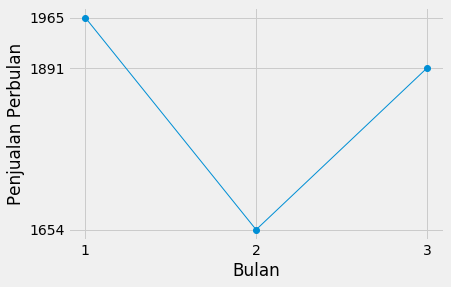

,Bulan,Transaksi
1,01,1965
2,02,1654
3,03,1891


In [23]:
#PENJUALAN PER BULAN
cursor.execute('''SELECT strftime('%m', transaksi.tanggal_transaksi), sum(transaksi.quantity) as total FROM transaksi
                group by strftime('%m', transaksi.tanggal_transaksi)''')

jumlah = []
for row in cursor.fetchall():
    jumlah.append(row)
    
#print(jumlah)  
np_jumlah = np.array(jumlah)
plt.plot([ int(x[0]) for x in np_jumlah[:,:]], [ int(x[1]) for x in np_jumlah[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_jumlah[:,:]], [ int(x[0]) for x in np_jumlah[:,:]])
plt.yticks([ int(x[1]) for x in np_jumlah[:,:]], [ int(x[1]) for x in np_jumlah[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Penjualan Perbulan')
plt.show()

df = pd.DataFrame([ x for x in np_jumlah[:,:]])
df.columns = ['Bulan','Transaksi']
df.index = np.arange(1,len(df)+1)
df

In [26]:
produk = df['Product line'].value_counts().reset_index()
produk.columns = ['Produk', 'Total']
produk

,Produk,Total
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


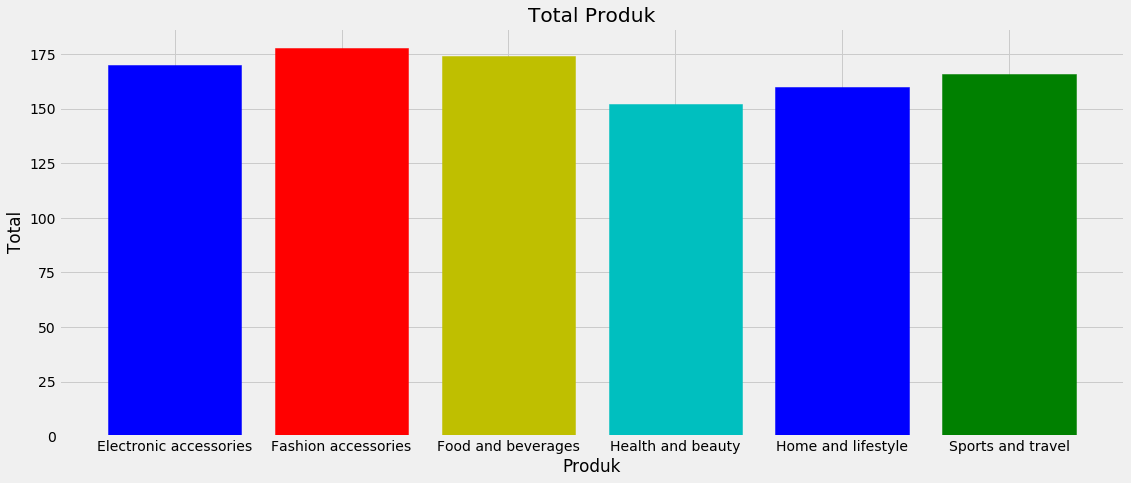

In [37]:
plt.figure(figsize=(17,7))
bars = plt.bar(produk['Produk'], produk['Total'])
bars[0].set_color('r')
bars[1].set_color('y')
bars[2].set_color('b')
bars[3].set_color('g')
bars[4].set_color('b')
bars[5].set_color('c')
plt.title('Total Produk')
plt.xlabel('Produk')
plt.ylabel('Total')
plt.show()

In [81]:
cabang = df['Branch'].value_counts().reset_index()
cabang.columns = ['Cabang', 'Total Pembelian']
cabang

,Cabang,Total Pembelian
0,A,340
1,B,332
2,C,328


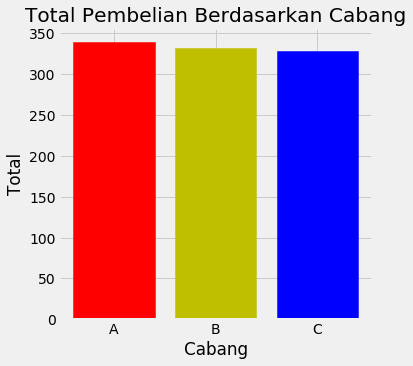

In [80]:
plt.figure(figsize=(5,5))
bars = plt.bar(cabang['Cabang'], cabang['Total Pembelian'])
bars[0].set_color('r')
bars[1].set_color('y')
bars[2].set_color('b')
plt.title('Total Pembelian Berdasarkan Cabang')
plt.xlabel('Cabang')
plt.ylabel('Total')
plt.show()

In [78]:
#Total Pembelian Berdasarkan Pengelompokkan Cabang dan Gender 
df.groupby(['Branch', 'Gender']).count()['Quantity']

Branch  Gender
A       Female    161
        Male      179
B       Female    162
        Male      170
C       Female    178
        Male      150
Name: Quantity, dtype: int64

Text(0,0.5,'Total')

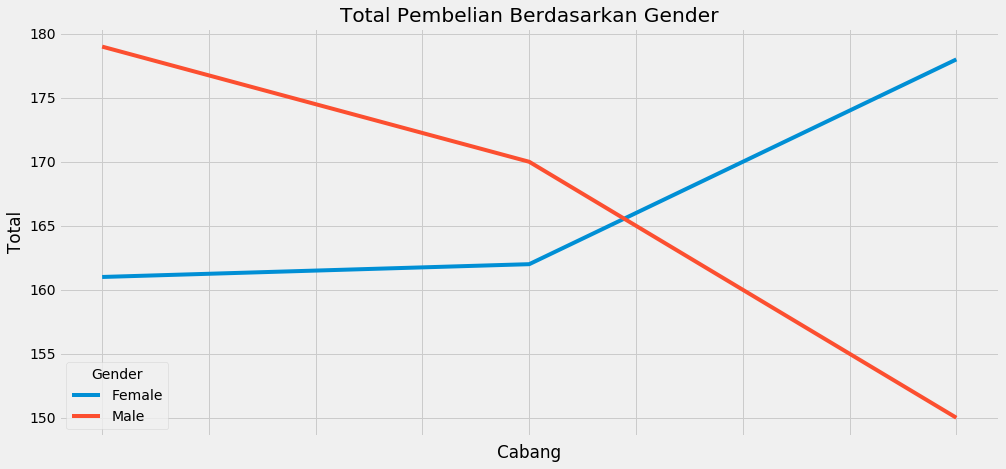

In [79]:
#Visualisasi Total Pembelian Berdasarkan Pengelompokkan Cabang dan Gender 
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Branch', 'Gender']).count()['Quantity'].unstack().plot(ax=ax)
plt.title('Total Pembelian Berdasarkan Gender')
plt.xlabel('Cabang')
plt.ylabel('Total')